In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_1samp
%matplotlib inline

In [22]:
data = pd.read_csv('data_ready.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,Sleep_quality,Time_in_bed,Activity_steps,Start_date,Start_time,Start_Dayofweek,Ate_late,Drank_coffee,Stressful_day,Worked_out,Activity_steps_log,Sleep_quality_log
0,0,115,70,398,10583,2016-11-17,11,Thursday,0,0,0,0,9.267004,4.248495
1,1,116,73,429,16053,2016-11-18,10,Friday,0,0,1,0,9.683651,4.290459
2,2,117,80,459,8794,2016-11-19,11,Saturday,0,0,0,0,9.081825,4.382027
3,3,118,75,429,2622,2016-11-20,10,Sunday,0,0,0,0,7.871693,4.317488
4,4,119,88,499,11744,2016-11-21,9,Monday,0,0,1,0,9.371098,4.477337


# Single variable regression

## Question: does the amount of steps I walk each day helps me sleep better?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Quick Regression')

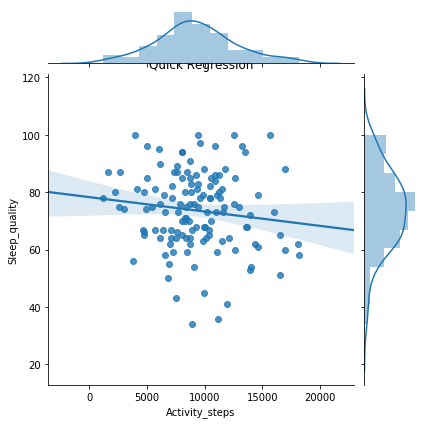

In [24]:
# a quick assessment #1

g = sns.JointGrid(x="Activity_steps", y="Sleep_quality", data=data)
g = g.plot(sns.regplot, sns.distplot)

# relationship appear to be linear

In [6]:
# quick regression #2

xs = data.Activity_steps
ys = data.Sleep_quality
res = scipy.stats.linregress(xs, ys)
res

LinregressResult(slope=-0.0005015893085962697, intercept=78.30835161387002, rvalue=-0.12795182415485182, pvalue=0.1452728488936484, stderr=0.000342312255750048)

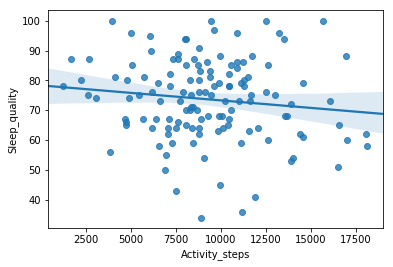

In [8]:
# plotting the line of best fit #2

sns.regplot(xs, ys);

### Building a linear model

In [10]:
# constructing linear model 

lr_model = ols(formula='Sleep_quality~Activity_steps', data=data).fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Sleep_quality   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.147
Date:                Thu, 18 Apr 2019   Prob (F-statistic):              0.145
Time:                        06:40:50   Log-Likelihood:                -525.51
No. Observations:                 131   AIC:                             1055.
Df Residuals:                     129   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         78.3084      3.391     23.096      0.000      71.600      85.017
Activity_steps    -0.0005      0.000     -1.465      0.145      -0.001       0.000
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.684
Skew:                          -0.260   Prob(JB):                        0.431
Kurtosis:                       3.195   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model assessment

### Required assumptions to obtain reliable estimators:
* Linear in parameters (assumption)
* Random sampling (assumption + the way data was collected)
* Zero conditional mean (assumption; the value of the explanatory variable must contain no information about the mean of the unobserved factors)
* Sample variation in the explanatory variable (assumption; the values of the explanatory variables are not all the same (otherwise it would be impossible to study how different values of the explanatory variable lead to different values of the dependent variable))
* Homoscedasticity  
* Normally distributed residuals  

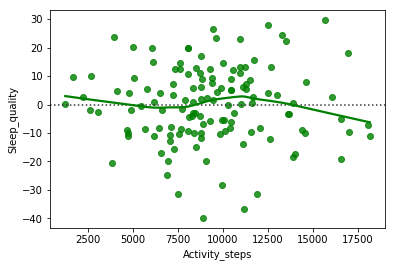

In [11]:
# residuals plot for quality vs duration

sns.residplot(data['Activity_steps'], data['Sleep_quality'], lowess=True, color="g");

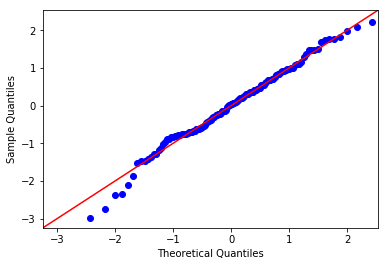

In [13]:
f2 = 'Sleep_quality~Activity_steps'
model2 = ols(formula=f2, data=data).fit()

resid2 = model2.resid

fig2 = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True,   )
#fig.show()

### Assessing normality of residuals with via Jarque-Bera Test

In [14]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model2.resid)
list(zip(name, test))

[('Jarque-Bera', 1.6836622144060367),
 ('Prob', 0.4309207384911302),
 ('Skew', -0.26004622094957075),
 ('Kurtosis', 3.194835960400607)]

### Assessing Hetereoscadasticity  via (GOLDFELD-QUANDT test)

In [15]:
# Run Goldfeld Quandt test
name2 = ['F statistic', 'p-value']
test2 = sms.het_goldfeldquandt(model2.resid, model2.model.exog)
list(zip(name2, test2))

# the null hypothesis assumes homoskedasticity 

[('F statistic', 1.415301000465405), ('p-value', 0.08436361085910044)]

## Data transformation 

### Log

In [17]:
# logging the steps
sub_logged2 = data[['Sleep_quality', 'Activity_steps']]
sub_logged2.head()

,Sleep_quality,Activity_steps
0,70,10583
1,73,16053
2,80,8794
3,75,2622
4,88,11744


In [19]:
sub_logged2['Sleep_quality_log'] = np.log(data['Sleep_quality'])
sub_logged2['Activity_steps_log'] = np.log(data['Activity_steps'])
sub_logged2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sleep_quality,Activity_steps,Sleep_quality_log,Activity_steps_log
0,70,10583,4.248495,9.267004
1,73,16053,4.290459,9.683651
2,80,8794,4.382027,9.081825
3,75,2622,4.317488,7.871693
4,88,11744,4.477337,9.371098


In [20]:
# logged model

log_model2 = ols(formula='Sleep_quality_log~Activity_steps_log', data=sub_logged2).fit()
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Sleep_quality_log   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.540
Date:                Thu, 18 Apr 2019   Prob (F-statistic):              0.113
Time:                        06:44:12   Log-Likelihood:                 27.007
No. Observations:                 131   AIC:                            -50.01
Df Residuals:                     129   BIC:                            -44.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8338      0.347     13.914      0.000       4.146       5.521
Activity_steps_log    -0.0611      0.038     -1.594      0.113      -0.137       0.015
==============================================================================
Omnibus:                       25.718   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.208
Skew:                          -0.971   Prob(JB):                     3.06e-09
Kurtosis:                       4.847   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

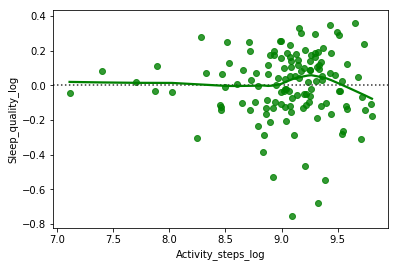

In [21]:
# a quick resplot

sns.residplot(sub_logged2['Activity_steps_log'], sub_logged2['Sleep_quality_log'], lowess=True, color="g");

## Sadly, my intuition has not been confirmed via the results of this simple regression. This model indicated that neither steps or steps_log are associated with